# This notebook will guide you through code sections in order to train a deep CNN that would be utilized to recognize handwritten prescription text

## Sections

---


1. Importing libraries and utilites
2. Loading datasets
  * Loading training dataset from remote source
  * Loading testing dataset from remote source
  * Loading training dataset from local source
  * Loading testing dataset from local source
3. Building and training the neural network
  * Configuring neural network attributes
  * Training with augmentation
    * Configuring augmentation
    * Training
  * Training without augmentation
4. Testing and validating trained model

## Importing libraries and utilites

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import cv2
import sys

In [ ]:
# Checking Python interpreter version
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
# Checking TensorFlow version
print(tf.version.VERSION)
# or
print(tf.__version__)

2.18.0
2.18.0


## Loading datasets

### Loading training dataset from remote source

In [ ]:
dataset_url = "https://github.com/ambientWave/Handwritten-Prescription-Text-Recognition-Deep-CNN-Tensorflow/raw/main/dataset/classified_training_data_inverted_padded.zip"
training_data_dir = tf.keras.utils.get_file('classified_training_data', origin=dataset_url, cache_dir='/usr', cache_subdir='datasets', archive_format='zip', extract=True)
training_data_dir += '/classified_data_square'

11916052/11916052 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Loading testing dataset from remote source

In [ ]:
validation_dataset_url = "https://github.com/ambientWave/Handwritten-Prescription-Text-Recognition-Deep-CNN-Tensorflow/raw/main/dataset/classified_test_data_inverted_padded.zip"
validation_data_dir = tf.keras.utils.get_file('classified_test_data', origin=validation_dataset_url, cache_dir='/usr', cache_subdir='datasets', archive_format='zip', extract=True)
validation_data_dir += '/classified_test_data_inverted_padded'

# Load and preprocess the validation data
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    batch_size=32,
    shuffle=False,
)

Found 135 files belonging to 9 classes.


### Loading training dataset from local source

In [ ]:
# unzip zip file
! unzip '/content/classified_training_data_inverted_padded.zip'

# Define the path to the dataset directory
training_data_dir = '/content/classified_data_square'

Archive:  /content/classified_training_data_inverted_padded.zip
   creating: classified_data_square/
   creating: classified_data_square/ator/
  inflating: classified_data_square/ator/ator_1.jpg  
  inflating: classified_data_square/ator/ator_10.jpg  
  inflating: classified_data_square/ator/ator_100.jpg  
  inflating: classified_data_square/ator/ator_11.jpg  
  inflating: classified_data_square/ator/ator_12.jpg  
  inflating: classified_data_square/ator/ator_13.jpg  
  inflating: classified_data_square/ator/ator_14.jpg  
  inflating: classified_data_square/ator/ator_15.jpg  
  inflating: classified_data_square/ator/ator_16.jpg  
  inflating: classified_data_square/ator/ator_17.jpg  
  inflating: classified_data_square/ator/ator_18.jpg  
  inflating: classified_data_square/ator/ator_19.jpg  
  inflating: classified_data_square/ator/ator_2.jpg  
  inflating: classified_data_square/ator/ator_20.jpg  
  inflating: classified_data_square/ator/ator_21.jpg  
  inflating: classified_data_squa

### Loading testing dataset from local source

In [ ]:
! unzip '/content/classified_test_data_inverted_padded.zip'

# Define the validation data directory
validation_data_dir = '/content/classified_test_data_inverted_padded'

# Load and preprocess the validation data
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    batch_size=32,
    shuffle=False,
)

Archive:  /content/classified_test_data_inverted_padded.zip
   creating: classified_test_data_inverted_padded/
   creating: classified_test_data_inverted_padded/ator/
  inflating: classified_test_data_inverted_padded/ator/ator_101.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_102.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_103.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_104.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_105.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_106.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_107.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_108.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_109.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_110.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_111.jpg  
  inflating: classified_test_data_inverted_padded/ator/ator_112

## Building and training the neural network

### Configuring neural network attributes

In [ ]:
# Define the image dimensions
img_width, img_height = 1280, 1280

In [ ]:
# Define the batch size
BATCH_SIZE = 32
NUM_CLASSES = 9

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(training_data_dir, batch_size=BATCH_SIZE, shuffle=True)

Found 900 files belonging to 9 classes.


### Training with augmentation

#### Configuring augmentation

In [ ]:
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.2),
    # tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomZoom(height_factor=0.2),
    # tf.keras.layers.RandomContrast(factor=0.2),
    tf.keras.layers.GaussianNoise(stddev=0.1)
])

#### Training with augmentation

In [ ]:
model = tf.keras.Sequential([
  data_augmentation_layers,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(NUM_CLASSES)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

epochs=30
history = model.fit(
  train_ds,
  epochs=epochs,
  validation_data=validation_ds
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.1236 - loss: 2.2003
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2072 - loss: 2.0795
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.2944 - loss: 1.9490
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.3514 - loss: 1.7306
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.4616 - loss: 1.5330
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.5016 - loss: 1.4535
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.5823 - loss: 1.3151
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.5566 - loss: 1.3517
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.6402 - loss: 1.1082
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.6459 - loss: 1.0584
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.6530 - loss: 0.9978
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/ste

### Training without augmentation

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  epochs=epochs,
  validation_data=validation_ds
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.1674 - loss: 14.3939 - val_accuracy: 0.2222 - val_loss: 2.8294
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.1512 - loss: 2.1533 - val_accuracy: 0.1926 - val_loss: 2.7311
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.1979 - loss: 1.9567 - val_accuracy: 0.1926 - val_loss: 2.2250
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.2800 - loss: 1.7971 - val_accuracy: 0.2148 - val_loss: 2.3135
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.3176 - loss: 1.7567 - val_accuracy: 0.1778 - val_loss: 2.6406
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.4166 - loss: 1.5836 - val_accuracy: 0.2741 - val_loss: 2.3280
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.4739 - loss: 1.3655 - val_accuracy: 0.2963 - val_loss: 2.0916
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.5248 - loss: 1.2231 - val_ac

Training without augmentation was better!

## Testing and validating trained model

In [ ]:
num_classes = model.output_shape[-1]
class_labels = [f'class_{i}' for i in range(num_classes)]
print(class_labels)

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8']


#### Testing one image per run

In [ ]:
# Load the test image
test_image = tf.io.read_file('/content/classified_test_data_inverted_padded/meronem/meronem_113.jpg')
test_image = tf.image.decode_jpeg(test_image, channels=3)

# Preprocess the test image
test_image = tf.image.resize(test_image, (256, 256))  # assuming the model expects 256x256 images
test_image = test_image / 255.0  # normalize pixel values to [0, 1]

# Convert the test image to a tensor
test_image = tf.convert_to_tensor(test_image)

# Add a batch dimension
test_image = tf.expand_dims(test_image, axis=0)

# Make a prediction
prediction = model.predict(test_image)

# Get the predicted class
predicted_class = tf.argmax(prediction, axis=1)
predicted_class = predicted_class.numpy()[0]

# Get the corresponding class label
class_labels = ['ator', 'atrovent', 'b_com', 'controloc', 'heparin', 'meronem', 'pulmicort', 'ringer', 'saline']
predicted_class_label = class_labels[predicted_class]

print(f'Predicted class: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: meronem


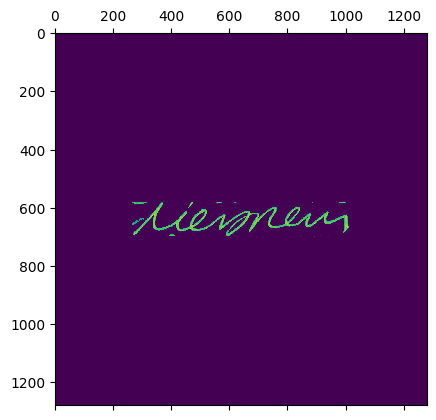

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('/content/classified_test_data_inverted_padded/meronem/meronem_113.jpg')
image = image.convert('L') # transform image color space to grayscale
image_array = np.array(image) # transform image to numpy 2d array
plt.matshow(image_array)

In [ ]:
probabilities = tf.nn.softmax(prediction)
print(probabilities)

tf.Tensor(
[[0.10479911 0.11196987 0.11226356 0.1133064  0.11039875 0.11557829
  0.11322192 0.10950319 0.10895887]], shape=(1, 9), dtype=float32)


#### Testing batch of images at once

In [ ]:
test_dir = validation_data_dir

# Create a data generator to load the test images
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    # image_size=(img_width, img_height)
)

# Make predictions on the test images
predictions = model.predict(test_dataset)

# Evaluate the model's performance
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy:.2f}')

# Get the predicted class labels
predicted_class_labels = tf.argmax(predictions, axis=1)

# Get the true class labels
true_class_labels = []
for images, labels in test_dataset.as_numpy_iterator():
    true_class_labels.extend(labels)

# Convert the true class labels to a numpy array
true_class_labels = np.array(true_class_labels)


# Get the corresponding class label
class_labels = ['ator', 'atrovent', 'b_com', 'controloc', 'heparin', 'meronem', 'pulmicort', 'ringer', 'saline']
# Print the true class labels
print([class_labels[true_class_label] for true_class_label in true_class_labels])

confusion_matrix = tf.math.confusion_matrix(true_class_labels, predicted_class_labels)
print(confusion_matrix)

# Evaluate the model's performance using metrics such as precision, recall, and F1 score
precision = precision_score(true_class_labels, predicted_class_labels, average='macro')
recall = recall_score(true_class_labels, predicted_class_labels, average='macro')
f1 = f1_score(true_class_labels, predicted_class_labels, average='macro')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 score: {f1:.2f}')

Found 135 files belonging to 9 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7549 - loss: 1.4938 
Test accuracy: 0.78
['b_com', 'heparin', 'heparin', 'pulmicort', 'heparin', 'saline', 'saline', 'b_com', 'heparin', 'meronem', 'heparin', 'saline', 'b_com', 'pulmicort', 'ringer', 'atrovent', 'controloc', 'heparin', 'controloc', 'pulmicort', 'saline', 'ringer', 'atrovent', 'meronem', 'ringer', 'saline', 'b_com', 'saline', 'ringer', 'saline', 'ringer', 'meronem', 'meronem', 'atrovent', 'controloc', 'pulmicort', 'b_com', 'ator', 'ator', 'controloc', 'controloc', 'saline', 'ringer', 'ator', 'saline', 'meronem', 'saline', 'heparin', 'atrovent', 'meronem', 'atrovent', 'meronem', 'heparin', 'ringer', 'atrovent', 'pulmicort', 'controloc', 'b_com', 'ator', 'b_com', 'meronem', 'b_com', 'ator', 'pulmicort', 'controloc', 'meronem', 'atrovent', 'b_com', 'controloc', 'heparin', 'ringer', 'saline', 'pulmicort', 'ringer', 'controloc', 'ator', 'meronem